In [ ]:
#!pip install pytest-warnings -->8.4.1 / 0.3.1
#!pip install numpy -->2.3.2
#!pip install pandas -->2.3.1
#!pip install matplotlib -->3.10.5
#!pip install seaborn -->0.13.2
#!pip install scikit-learn -->joblib-1.5.1 scikit-learn-1.7.1 scipy-1.16.1 threadpoolctl-3.6.0

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.shape

(299, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.isna().mean()

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

In [8]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [9]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [10]:
# missing values in descending order
df.isnull().sum().sort_values(ascending=False)


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [11]:
# duplicated values
df.duplicated().sum()

np.int64(0)

In [12]:
# numerical and categorical features 
Categorical = df.select_dtypes(include=['object'])
Numerical = df.select_dtypes(include=['int64', 'float64'])
print('Categorical features:\n', Categorical)
print('Numerical features:\n', Numerical)

Categorical features:
 Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[299 rows x 0 columns]
Numerical features:
       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                     

In [13]:
# count target variable
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

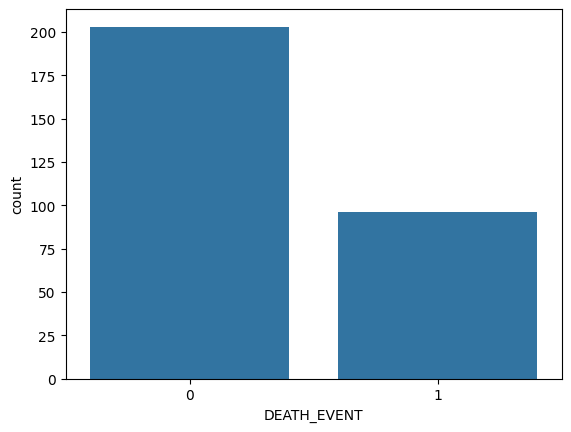

In [14]:
ax=sns.countplot(x=df['DEATH_EVENT'])

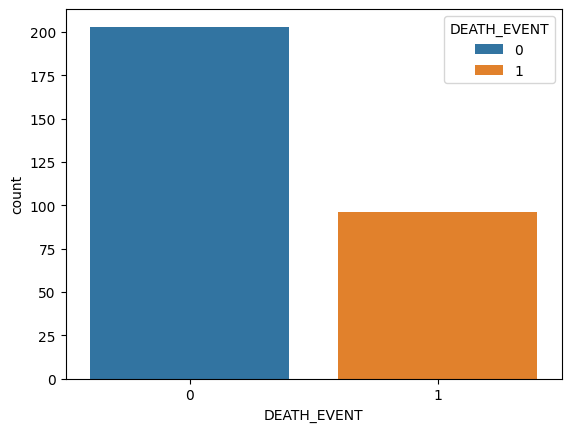

In [15]:
ax=sns.countplot(x='DEATH_EVENT', hue='DEATH_EVENT', data=df)

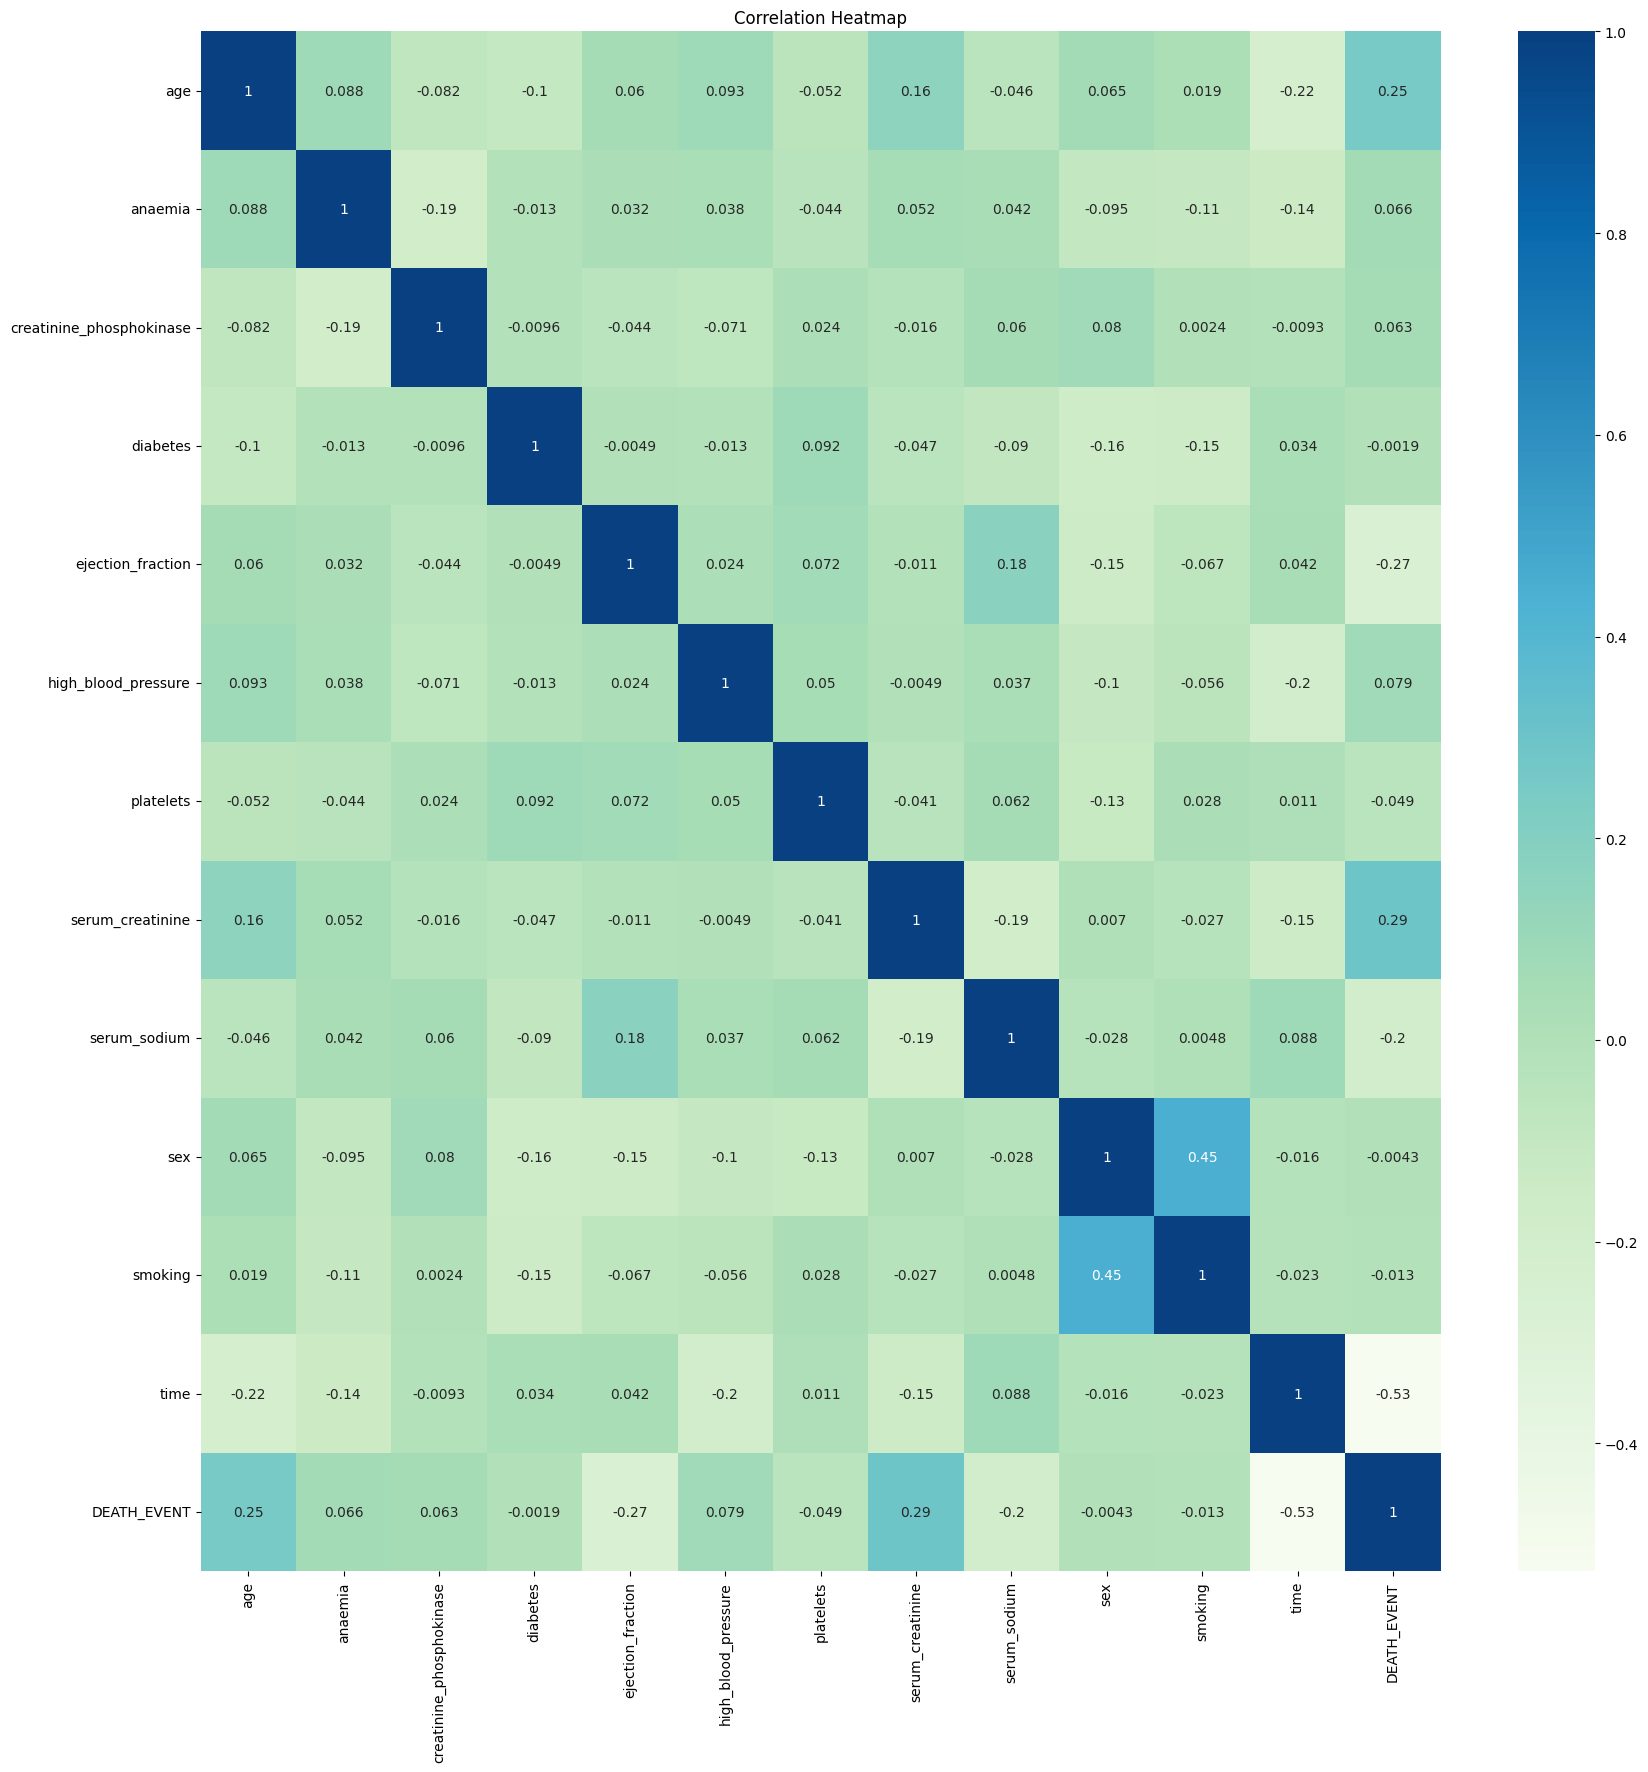

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap="GnBu", annot=True)
plt.title("Correlation Heatmap")
plt.show()

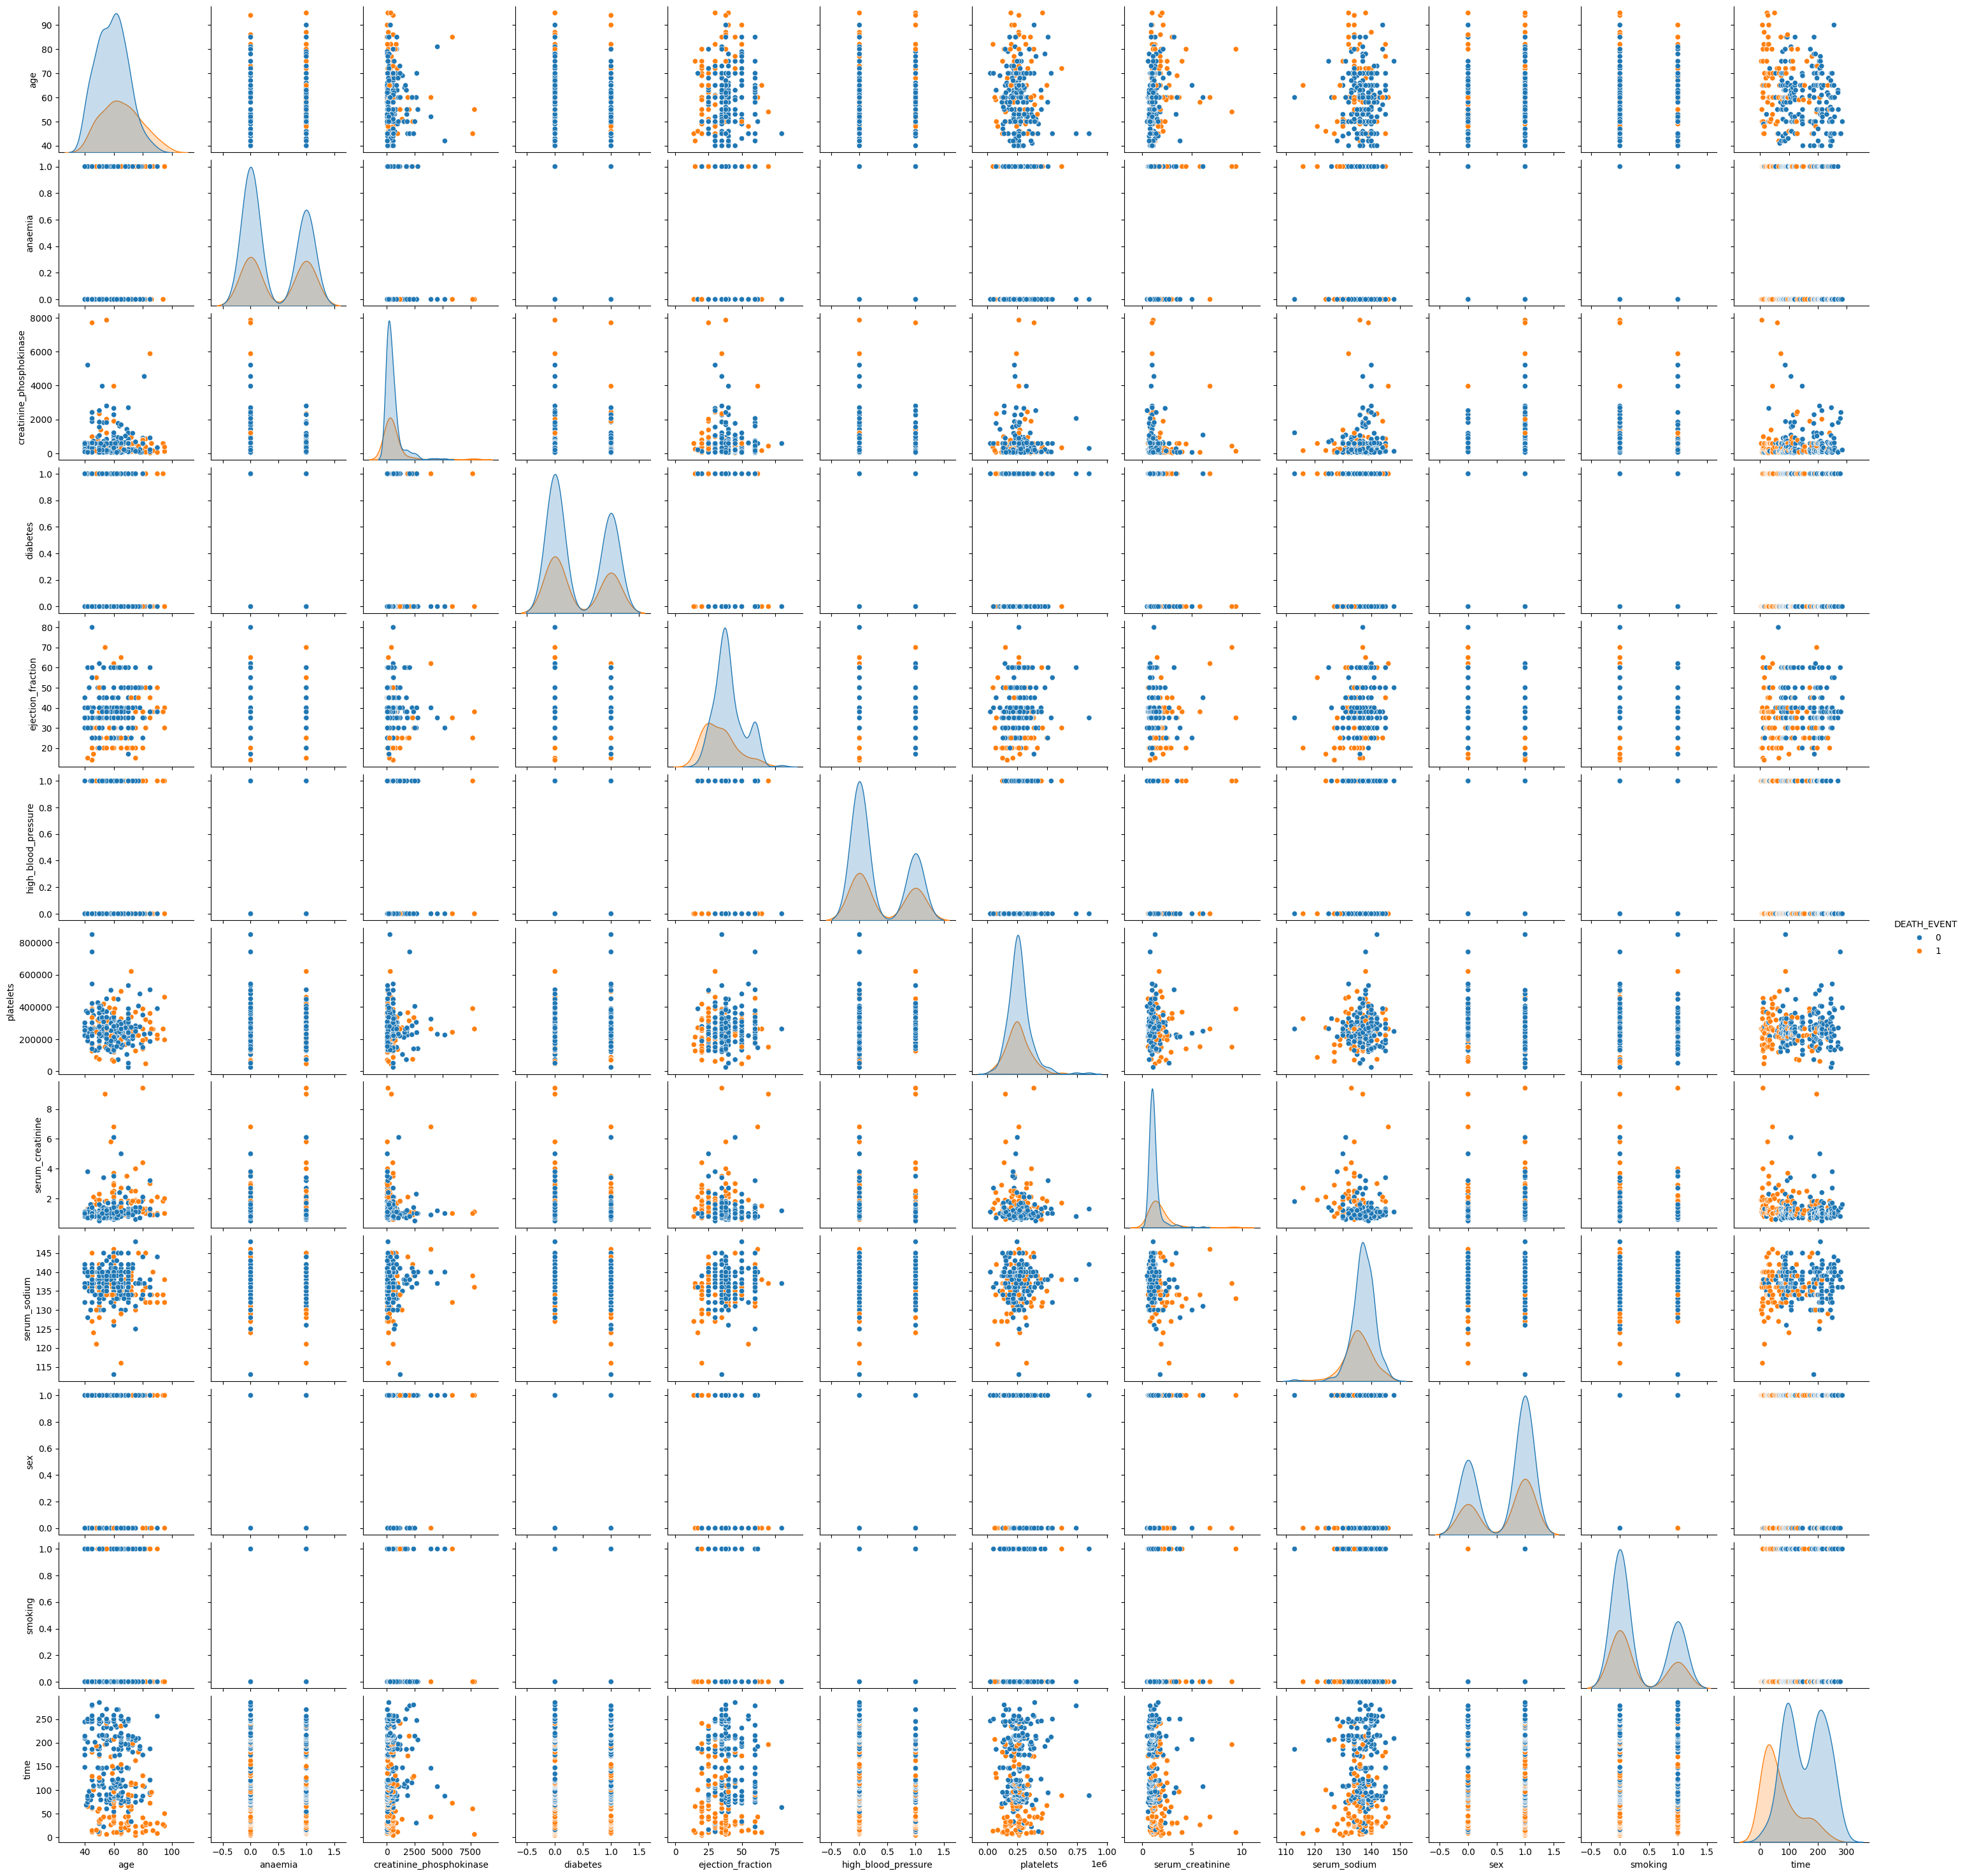

In [17]:
sns.pairplot(df, hue='DEATH_EVENT')
plt.show()

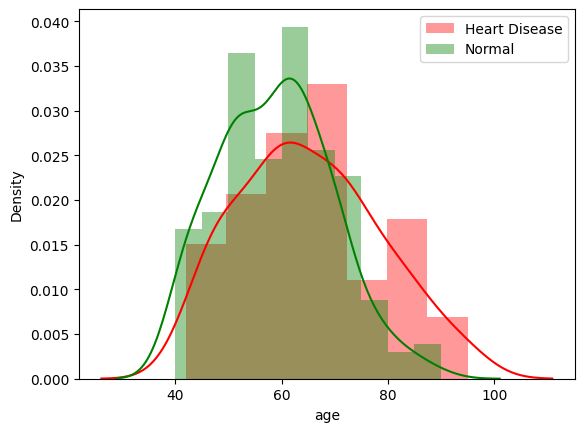

In [18]:
# distribution plot of Age for Death Event
sns.distplot(df['age'][df['DEATH_EVENT'] == 1], kde=True, color='red', label='Heart Disease')
sns.distplot(df['age'][df['DEATH_EVENT'] == 0], kde=True, color='green', label='Normal')
plt.legend()

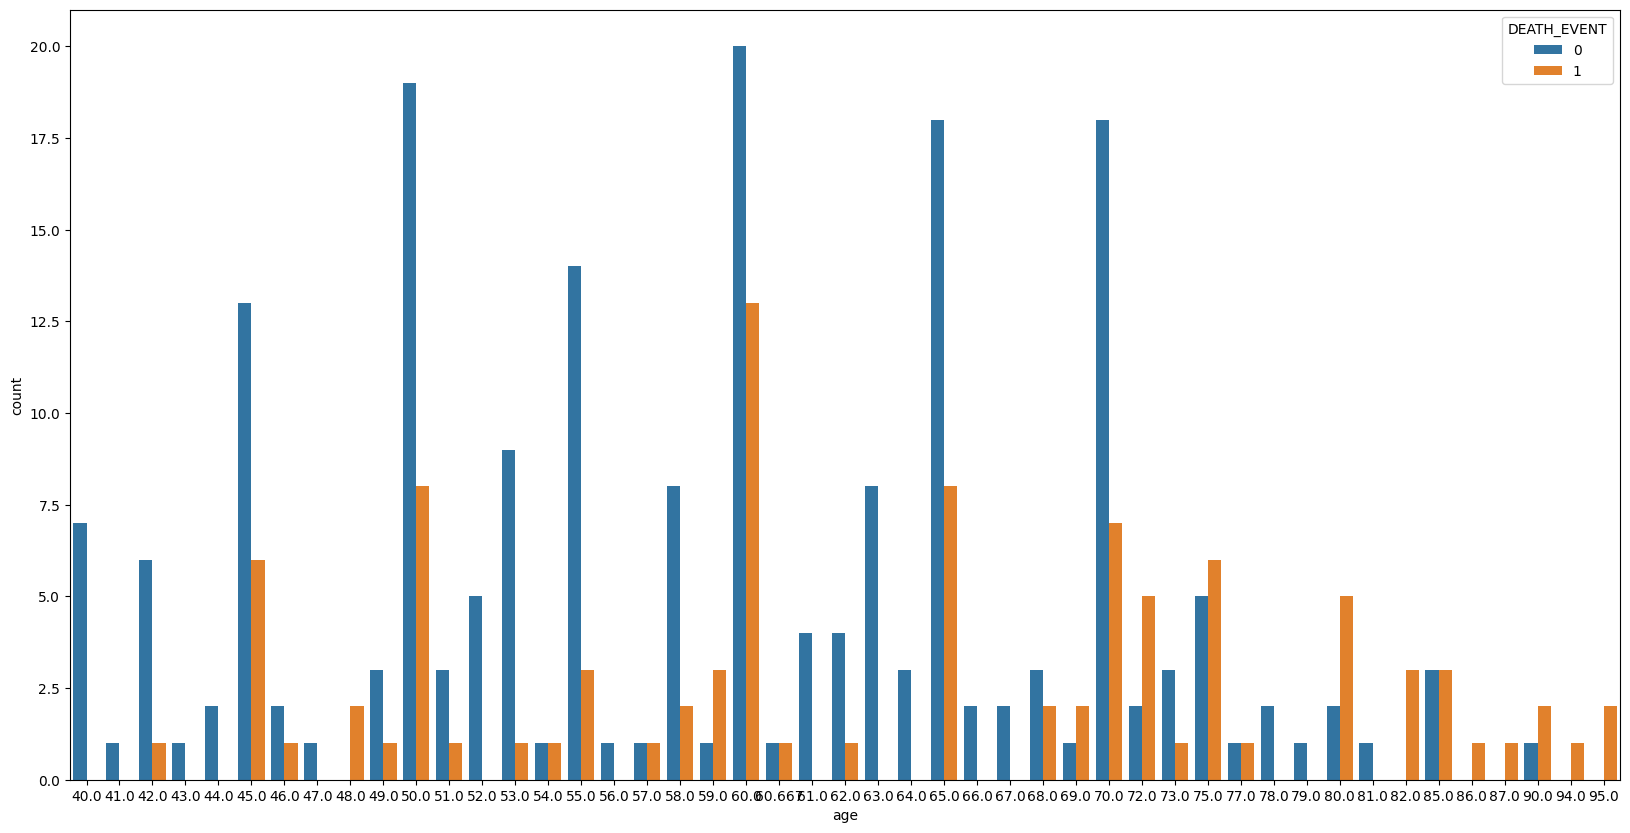

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['age'], data=df, hue='DEATH_EVENT')
plt.show()

In [20]:
features=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine',
          'serum_sodium','time']

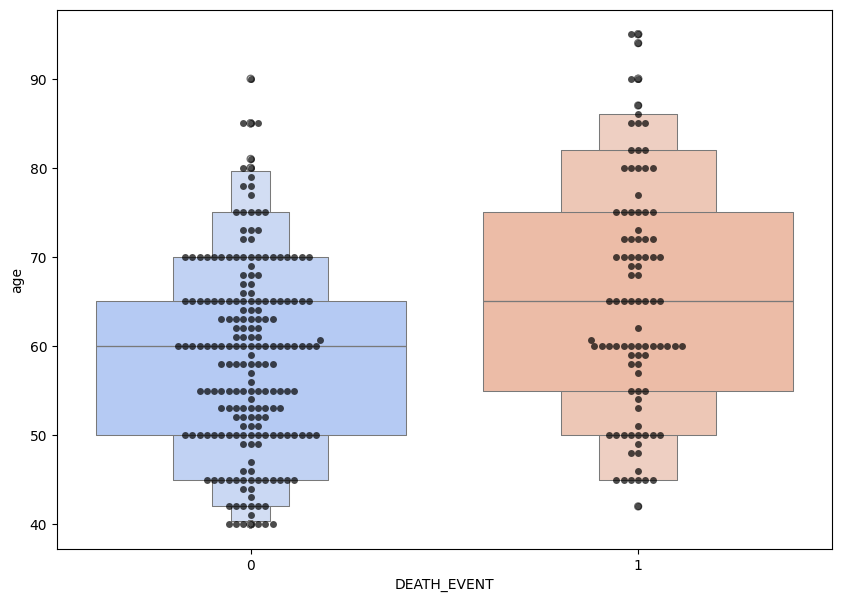

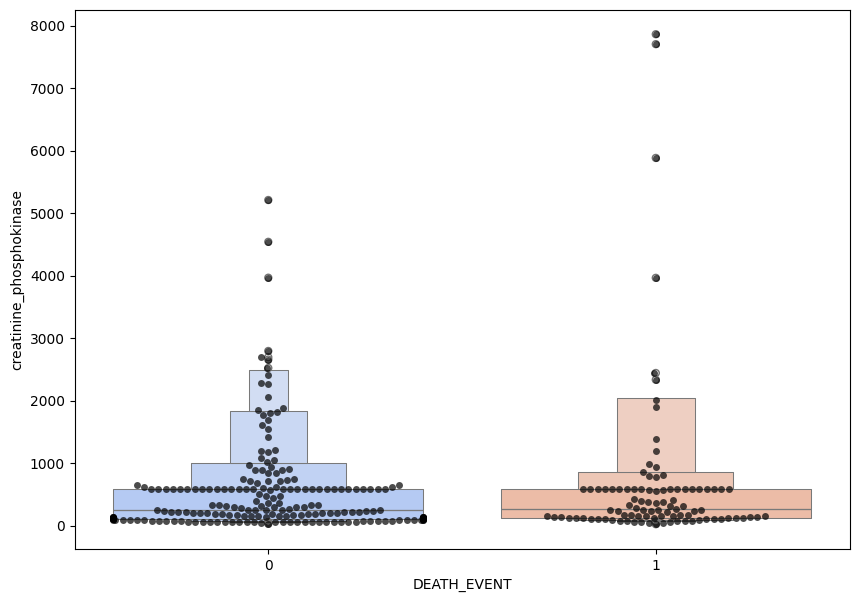

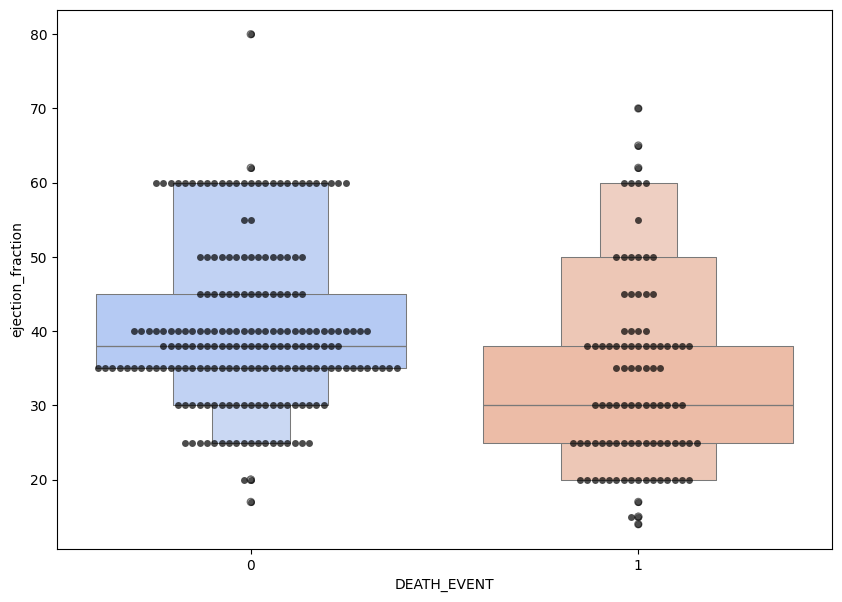

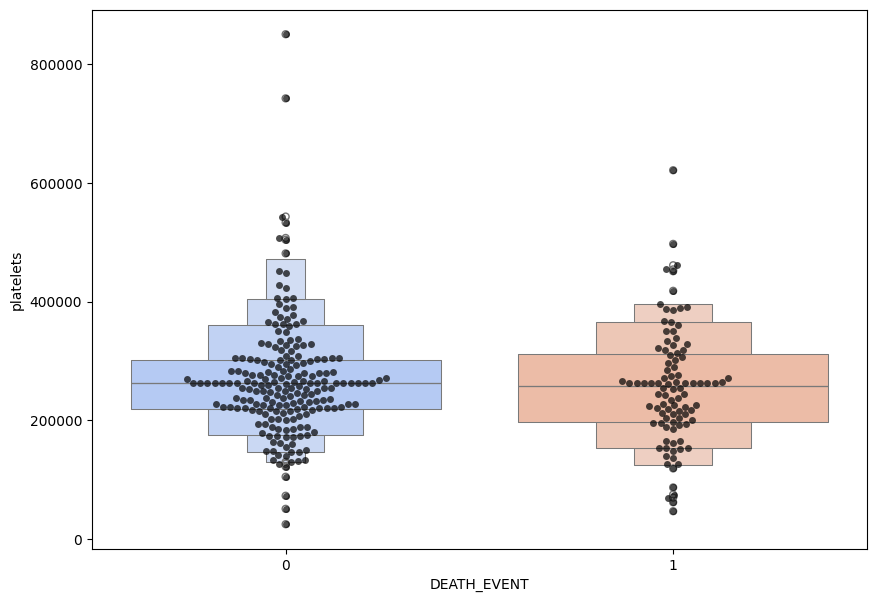

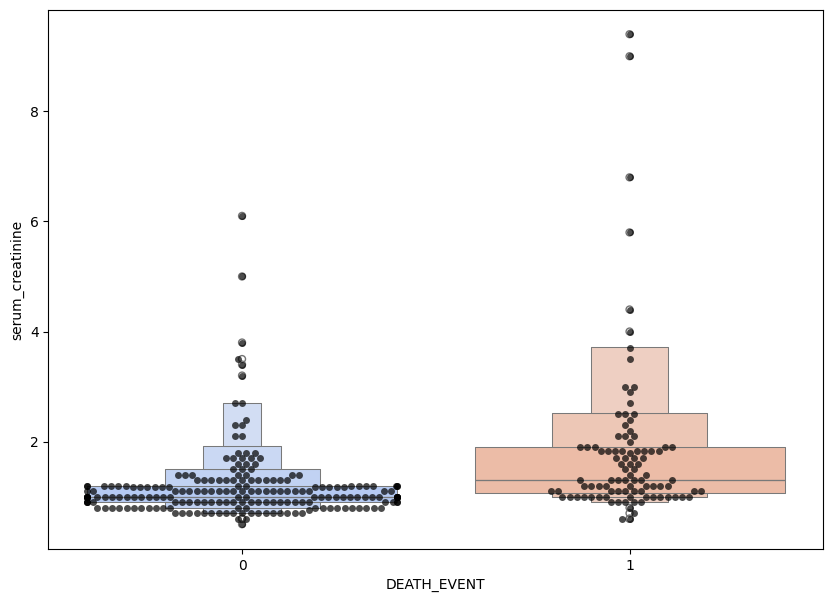

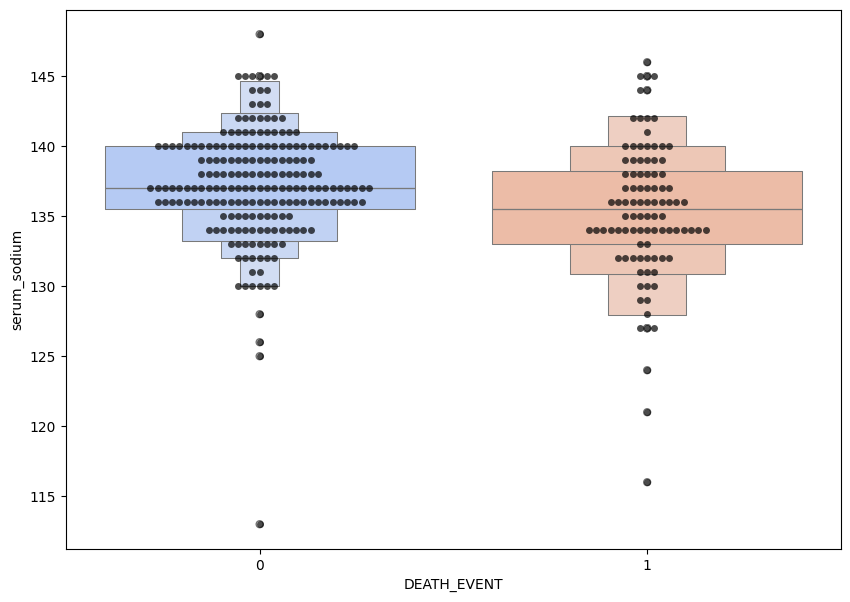

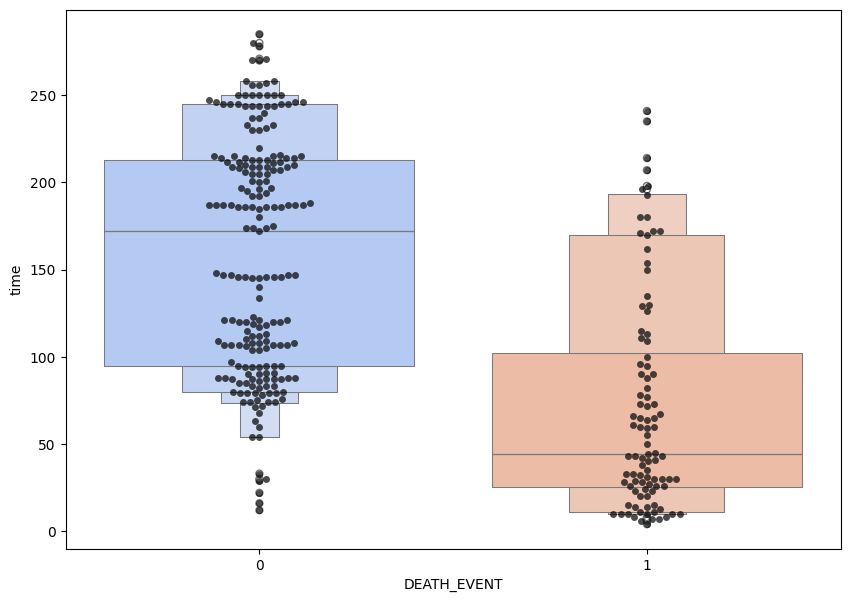

In [21]:
for i  in features:
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=df['DEATH_EVENT'], y=df[i], color='black',alpha=0.7)
    sns.boxenplot(x=df['DEATH_EVENT'], y=df[i], palette='coolwarm')
    plt.show()

In [22]:
# separate features and target
X=df.drop(['DEATH_EVENT'],axis=1)
y=df['DEATH_EVENT']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [26]:
np.round(X_train.describe(), 1)   # original X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,209.0,209.0,209.0,209.0,209.0,209.0,209.0,209.0,209.0,209.0,209.0,209.0
mean,60.9,0.5,600.3,0.4,38.1,0.4,264044.0,1.4,136.8,0.6,0.3,127.8
std,11.5,0.5,1029.4,0.5,12.2,0.5,98659.4,1.1,4.1,0.5,0.5,77.5
min,40.0,0.0,23.0,0.0,15.0,0.0,25100.0,0.5,116.0,0.0,0.0,4.0
25%,50.0,0.0,121.0,0.0,30.0,0.0,212000.0,0.9,134.0,0.0,0.0,71.0
50%,60.0,0.0,253.0,0.0,38.0,0.0,263358.0,1.1,137.0,1.0,0.0,111.0
75%,68.0,1.0,582.0,1.0,45.0,1.0,304000.0,1.3,139.0,1.0,1.0,198.0
max,95.0,1.0,7861.0,1.0,80.0,1.0,850000.0,9.4,148.0,1.0,1.0,278.0


In [27]:
np.round(X_train_scaled.describe(), 1)   # scaled X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,209.0,209.0,209.0,209.0,209.0,209.0,209.0,209.0,209.0,209.0,209.0,209.0
mean,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.8,-0.9,-0.6,-0.9,-1.9,-0.8,-2.4,-0.8,-5.0,-1.4,-0.6,-1.6
25%,-0.9,-0.9,-0.5,-0.9,-0.7,-0.8,-0.5,-0.4,-0.7,-1.4,-0.6,-0.7
50%,-0.1,-0.9,-0.3,-0.9,-0.0,-0.8,-0.0,-0.3,0.1,0.7,-0.6,-0.2
75%,0.6,1.1,-0.0,1.1,0.6,1.3,0.4,-0.1,0.5,0.7,1.5,0.9
max,3.0,1.1,7.1,1.1,3.5,1.3,6.0,7.3,2.7,0.7,1.5,1.9


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
lr=LogisticRegression()
lr.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [30]:
y_pred=lr.predict(X_test_scaled)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0])

In [31]:
np.array(y_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0])

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8333333333333334
Confusion Matrix:
 [[56  5]
 [10 19]]


<Axes: >

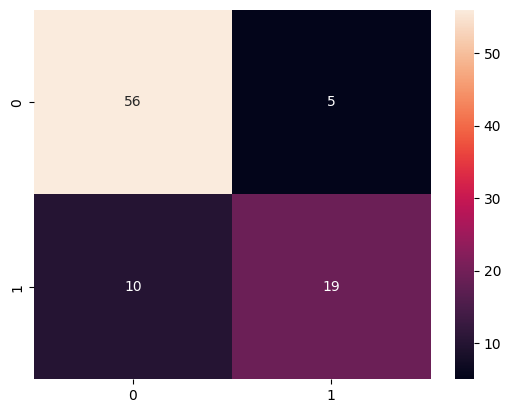

In [33]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [34]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        61
           1       0.79      0.66      0.72        29

    accuracy                           0.83        90
   macro avg       0.82      0.79      0.80        90
weighted avg       0.83      0.83      0.83        90



In [35]:
import sklearn.svm as svm
svm=svm.SVC()
svm.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [36]:
y_pred_svm=svm.predict(X_test)
y_pred_svm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [37]:
np.array(y_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0])

In [38]:
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Accuracy: 0.6777777777777778
Confusion Matrix:
 [[61  0]
 [29  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      1.00      0.81        61
           1       0.00      0.00      0.00        29

    accuracy                           0.68        90
   macro avg       0.34      0.50      0.40        90
weighted avg       0.46      0.68      0.55        90



<Axes: >

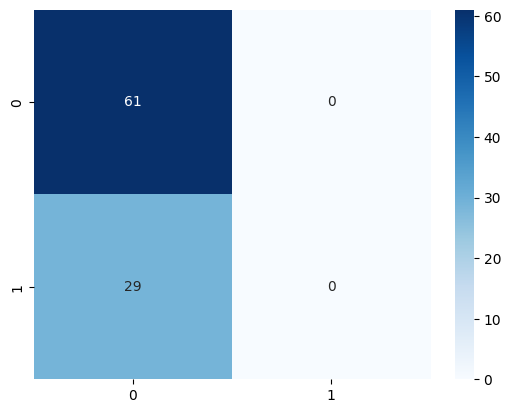

In [39]:
sns.heatmap(confusion_matrix(y_test,y_pred_svm), annot=True, cmap="Blues")

In [1]:
#!pip install xgboost -->-3.0.4


In [40]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [41]:
y_pred_xgb = xgb.predict(X_test)


In [42]:
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.8111111111111111
Confusion Matrix:
 [[57  4]
 [13 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87        61
           1       0.80      0.55      0.65        29

    accuracy                           0.81        90
   macro avg       0.81      0.74      0.76        90
weighted avg       0.81      0.81      0.80        90



In [43]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8, 1.0], 'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [100, 200, ...], ...}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [44]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
Best CV Accuracy: 0.856562137049942


In [45]:
best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)

In [46]:
print("Tuned XGBoost Test Accuracy:", accuracy_score(y_test, y_pred_best))


Tuned XGBoost Test Accuracy: 0.8222222222222222


In [47]:
#!pip install tensorflow -->-2.20.0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [48]:
ann = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')   # sigmoid for binary classification
])


In [49]:
ann.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [50]:
history = ann.fit(X_train_scaled, y_train, 
                  epochs=50, batch_size=16, 
                  validation_split=0.2, verbose=0)


In [51]:
y_pred_ann = (ann.predict(X_test_scaled) > 0.5).astype("int32")
print("ANN Test Accuracy:", accuracy_score(y_test, y_pred_ann))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
ANN Test Accuracy: 0.7888888888888889


In [52]:
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(min_delta=0.001, patience=10, restore_best_weights=True)

In [53]:
from tensorflow.keras.layers import Dropout
model=Sequential()
model.add(Dense(units=128, activation='relu',input_dim=12))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=1, activation='sigmoid'))

In [54]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [55]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,825 (22.75 KB)

 Trainable params: 5,825 (22.75 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
history=model.fit(X_train, y_train, batch_size=20, epochs=100, callbacks=[early_stopping],
                  validation_split=0.25)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5000 - loss: 7071.7837 - val_accuracy: 0.7358 - val_loss: 1726.1533
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5641 - loss: 4281.6665 - val_accuracy: 0.7358 - val_loss: 1543.6777
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5449 - loss: 3313.7930 - val_accuracy: 0.7358 - val_loss: 278.2178
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5641 - loss: 1864.1018 - val_accuracy: 0.7358 - val_loss: 359.7974
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5321 - loss: 1094.4631 - val_accuracy: 0.7358 - val_loss: 246.0641
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5705 - loss: 615.0389 - val_accuracy: 0.2642 - val_loss: 192.2804
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5769 - loss: 591.7440 - val_accuracy: 0.7358 - val_loss: 126.8949
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5192 - loss: 251.6840 - va

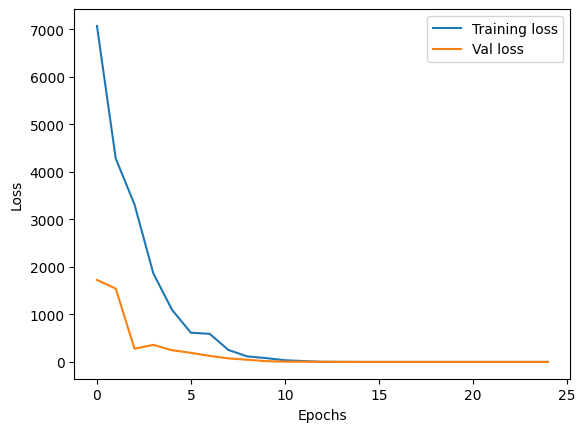

In [57]:
history_df=pd.DataFrame(history.history)
plt.plot(history_df.loc[:,['loss']],label="Training loss")
plt.plot(history_df.loc[:,['val_loss']],label="Val loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [58]:
print(history_df.columns)
print(history_df['loss'].min(), history_df['loss'].max())
print(history_df['val_loss'].min(), history_df['val_loss'].max())

Index(['accuracy', 'loss', 'val_accuracy', 'val_loss'], dtype='object')
0.6663426160812378 7071.78369140625
0.6044556498527527 1726.1533203125


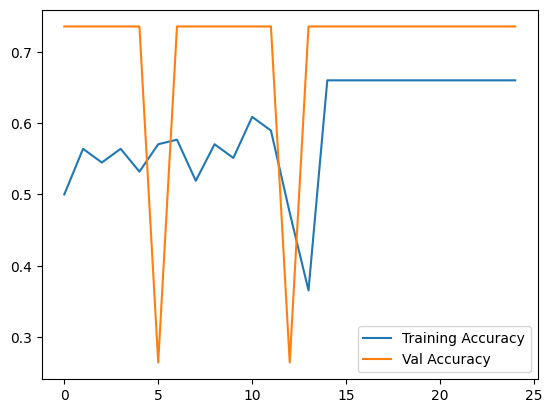

In [59]:
plt.plot(history_df.loc[:,['accuracy']],label="Training Accuracy")
plt.plot(history_df.loc[:,['val_accuracy']],label="Val Accuracy")
plt.legend()
plt.show()